# Apropiación del Notebook de Andrés Allievi

# Cuantización por canales de colores

El presente cuaderno tiene por objetivo explorar la cuantizacion  no solo en escala de grises sino en su efecto en los distintos canales de colores BRG

## Importacion de Librerias y obtención de Imagen

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

## Levantar la imagen y pasarla a RGB

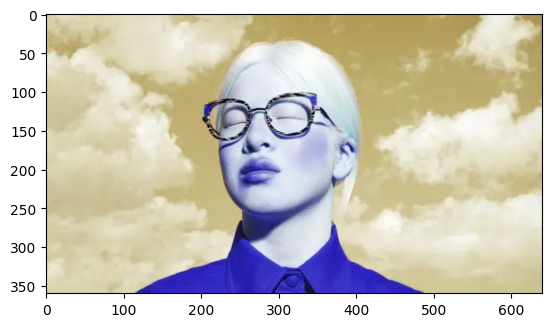

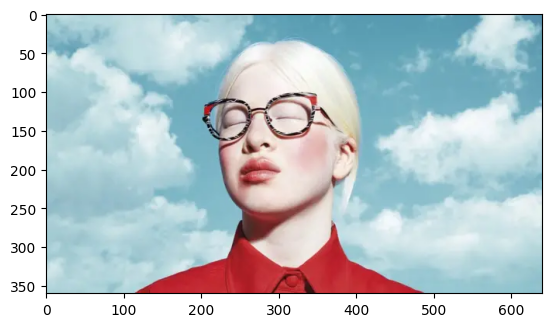

In [9]:
imagen_original = imread('cielo.jpg')
plt.imshow(imagen_original)
plt.show()
img_rgb=cv2.cvtColor(imagen_original,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Funciones Aplicadas

Devuelve 1 canal en grises obtenido con el promedio de los 3 canales

In [4]:
#Calcula devuelve 1 canal en grises obtenido con el promedio de los 3 canales
def convertirGrises(imagen):
    pixeles=np.mean(imagen,axis=2)
    return pixeles.astype(np.uint8)

### Reducción de tonos en la imagen

In [5]:
#Reduce los tonos de la imagen
def reducirTonos(matriz, tonos):

    # Calcular el factor de escala
    factor_escala = 255 / (tonos - 1) if tonos > 1 else 1

    # Iterar sobre la matriz y reescalar los valores
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            nuevo_valor = int(round(matriz[i, j] / factor_escala) * factor_escala)
            matriz[i, j] = np.clip(nuevo_valor, 0, 255)  # Asegurar que los valores estén en el rango 0-255

    return matriz

### Reducción de tonos en canales separados

In [6]:
#Devuelve una imagen de 3 canales donde se reducen los tonos de cada canal de forma separada
def reduceCanales(imagen,tonos):
    imagen_R=imagen[:,:,2]
    imagen_G=imagen[:,:,1]
    imagen_B=imagen[:,:,0]
    imagen_R=reducirTonos(imagen_R.copy(),tonos)
    imagen_G=reducirTonos(imagen_G.copy(),tonos)
    imagen_B=reducirTonos(imagen_B.copy(),tonos)
    imagen_bgr=np.dstack((imagen_B,imagen_G,imagen_R))
    return imagen_bgr

### Imagen en color, escala de grises y escala de colores

In [7]:
#Muestra la imagen en color, en 3 canales en grises, en 1 solo canal en grises y los canales en forma separada
def MuestraCanales(imagen,tonos=256):

    #Muestra la imagen en colores y en grises
    img_gris_canales=convertirGrises(imagen.copy())
    img_gris=reducirTonos(convertirGrises(imagen_original.copy()),tonos)
    img_rgb=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(img_gris, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f'1 canal de {tonos} tonos en grises')
    axes[1].imshow(img_gris_canales, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(f'{tonos} tonos por canal en grises')
    axes[2].imshow(img_rgb)
    axes[2].axis('off')
    axes[2].set_title(f'{tonos} tonos por canal en RGB')
    plt.tight_layout()
    plt.show()

    # Separar los canales de color y los muestra en color y en grises
    imagen_R=img_rgb[:,:,0]
    imagen_G=img_rgb[:,:,1]
    imagen_B=img_rgb[:,:,2]

    fig, axes = plt.subplots(2, 3, figsize=(10, 10))
    axes[0,0].imshow(imagen_R, cmap='Reds')
    axes[0,0].axis('off')
    axes[0,0].set_title(f'{tonos} tonos - Canal R')
    axes[0,1].imshow(imagen_G, cmap='Greens')
    axes[0,1].axis('off')
    axes[0,1].set_title(f'{tonos} tonos - Canal G')
    axes[0,2].imshow(imagen_B, cmap='Blues')
    axes[0,2].axis('off')
    axes[0,2].set_title(f'{tonos} tonos - Canal B')
    axes[1,0].imshow(imagen_R, cmap='gray')
    axes[1,0].axis('off')
    axes[1,0].set_title(f'{tonos} tonos - Canal R en Grises')
    axes[1,1].imshow(imagen_G, cmap='gray')
    axes[1,1].axis('off')
    axes[1,1].set_title(f'{tonos} tonos - Canal G en Grises')
    axes[1,2].imshow(imagen_B, cmap='gray')
    axes[1,2].axis('off')
    axes[1,2].set_title(f'{tonos} tonos - Canal B en grises')
    plt.tight_layout()
    plt.show()


    # Calcula el histograma para cada imagen
    hist_gris, bins_gris = np.histogram(img_gris, bins=256, range=(0, 256))
    hist_R, bins_R = np.histogram(imagen_R, bins=256, range=(0, 256))
    hist_G, bins_G = np.histogram(imagen_G, bins=256, range=(0, 256))
    hist_B, bins_B = np.histogram(imagen_B, bins=256, range=(0, 256))

    # Crea el gráfico con los histogramas
    fig, axes = plt.subplots(2, 2, figsize=(15, 5))

    axes[0,0].plot(bins_gris[:-1], hist_gris, color='black', label='Gris', alpha=0.5)
    axes[0,0].legend()  # Muestra la leyenda para identificar cada histograma

    axes[0,1].plot(bins_R[:-1], hist_R, color='red', label='Rojo', alpha=0.5)
    axes[0,1].legend()  # Muestra la leyenda para identificar cada histograma

    axes[1,0].plot(bins_G[:-1], hist_G, color='green', label='Verde', alpha=0.5)
    axes[1,0].legend()  # Muestra la leyenda para identificar cada histograma

    axes[1,1].plot(bins_B[:-1], hist_B, color='blue', label='Azul', alpha=0.5)
    axes[1,1].legend()  # Muestra la leyenda para identificar cada histograma
    plt.tight_layout()
    plt.show()


##Pruebas con distintos valores de tonos

### Aplicación de tonalidad con distintos graduación de salida de tonos (256, 64, 16, 4)


###############################
  Imagen con 256 tonos      
###############################



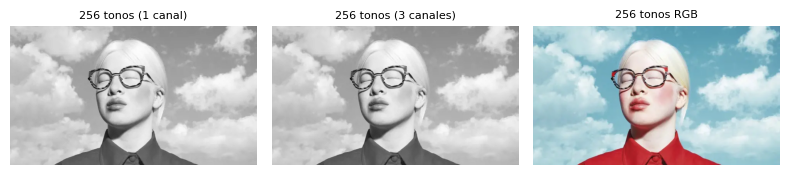

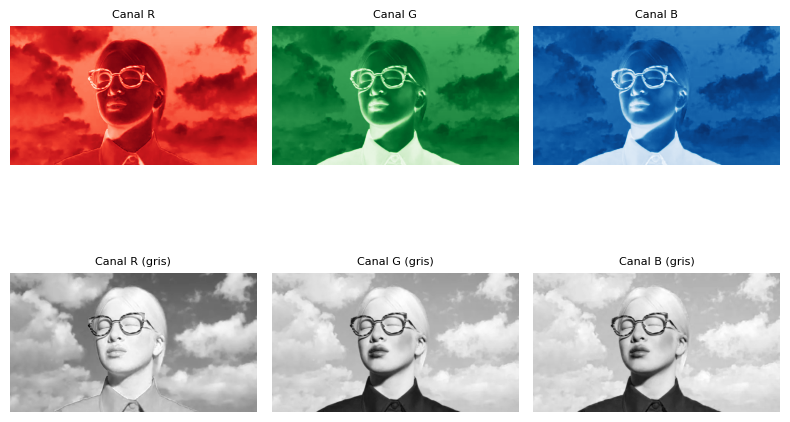

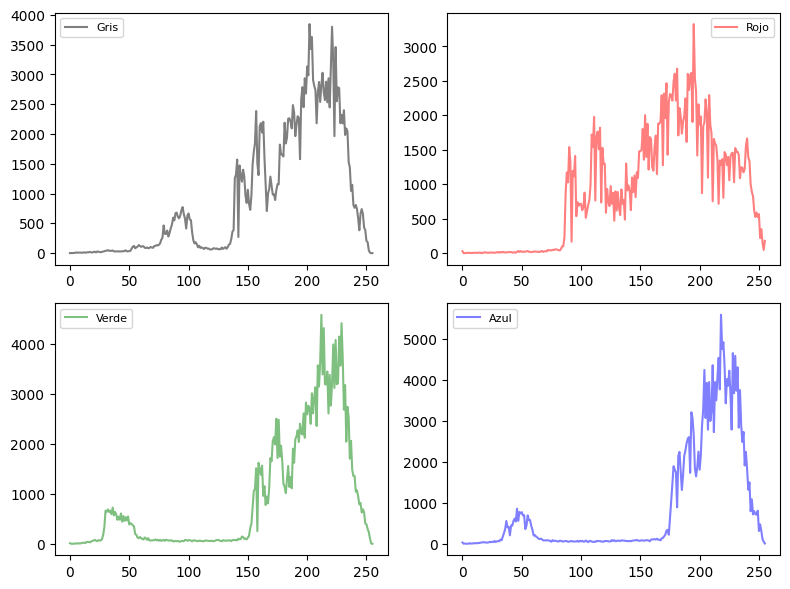


###############################
  Imagen con 64 tonos      
###############################



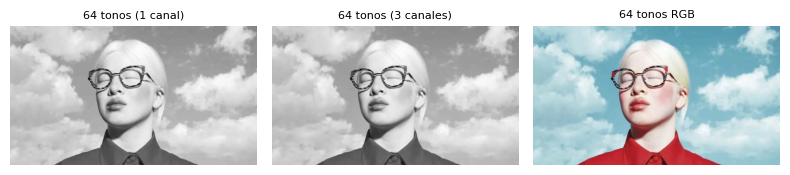

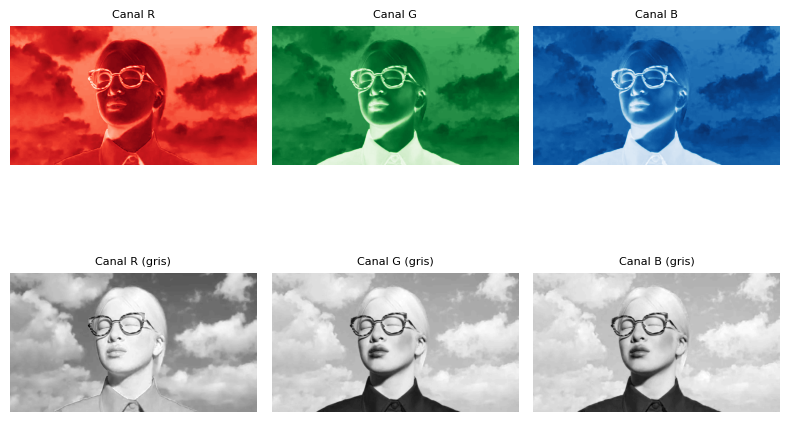

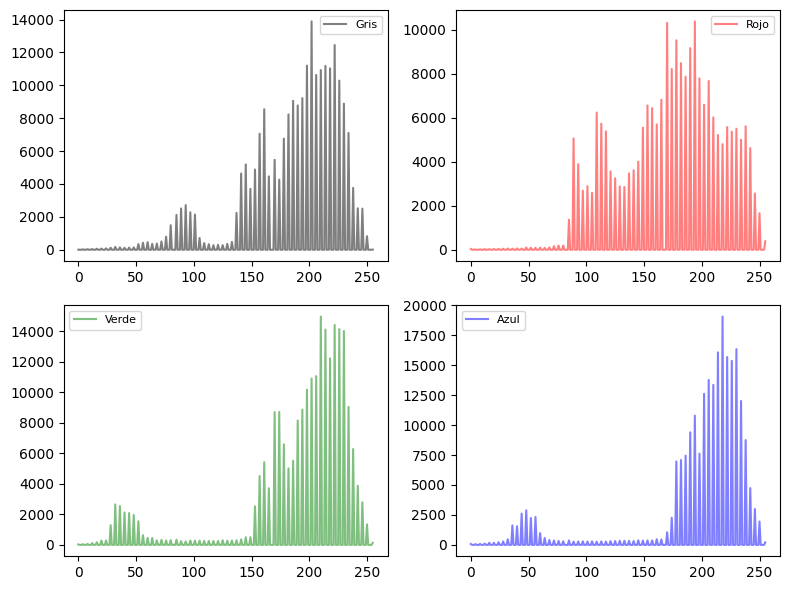


###############################
  Imagen con 16 tonos      
###############################



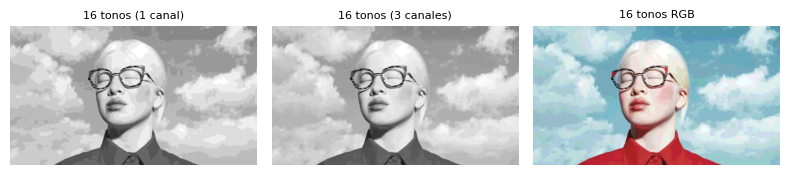

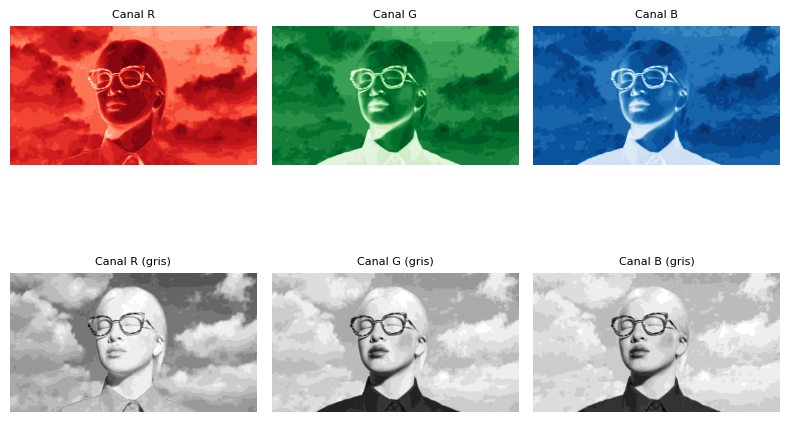

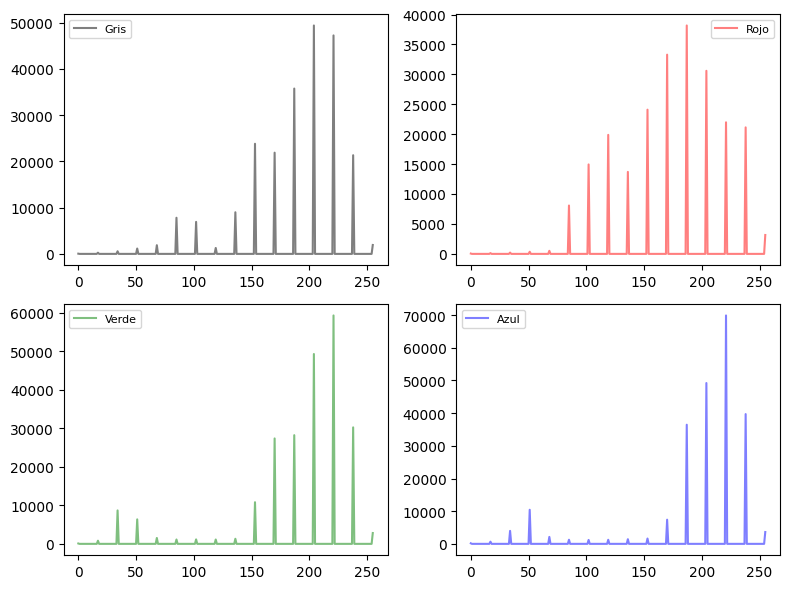


###############################
  Imagen con 4 tonos      
###############################



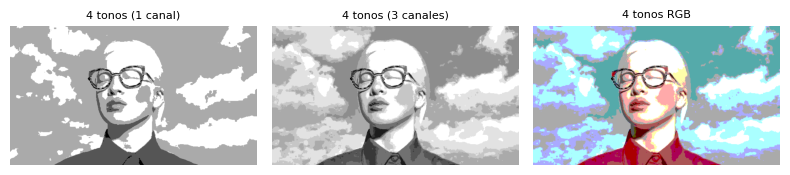

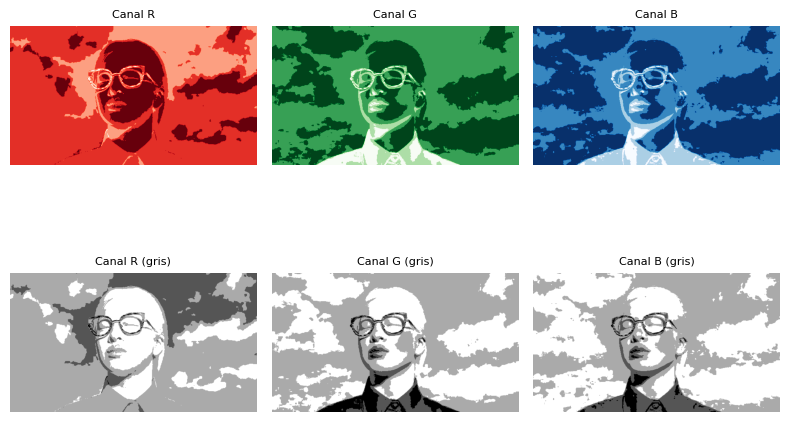

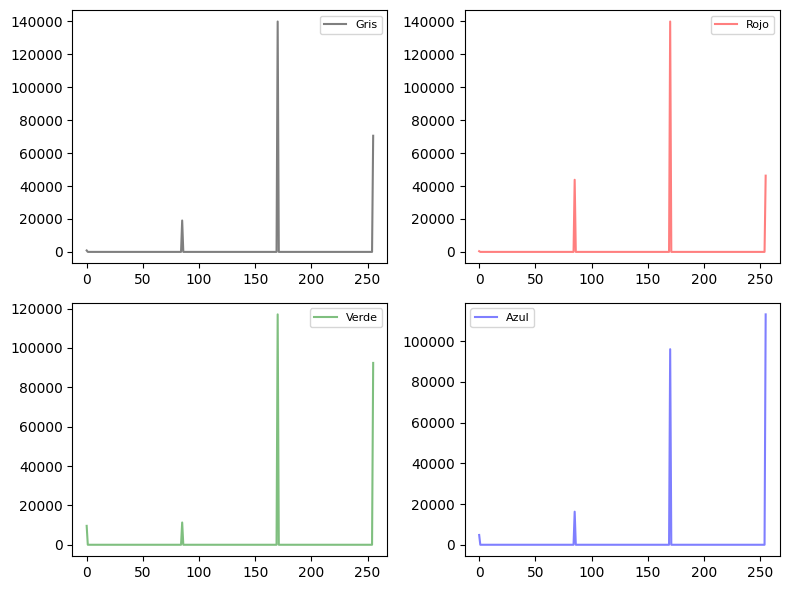

In [15]:
# Reducir la lista de tonos para generar menos salida
lista_tonos = [256, 64, 16, 4]  # Reducimos a solo 4 valores en lugar de 8

# Ajustamos el tamaño de las figuras para que sean más pequeñas
def MuestraCanales(imagen, tonos=256):
    #Muestra la imagen en colores y en grises
    img_gris_canales = convertirGrises(imagen.copy())
    img_gris = reducirTonos(convertirGrises(imagen_original.copy()), tonos)
    img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    
    # Reducimos el tamaño de la figura
    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    axes[0].imshow(img_gris, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f'{tonos} tonos (1 canal)', fontsize=8)
    axes[1].imshow(img_gris_canales, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(f'{tonos} tonos (3 canales)', fontsize=8)
    axes[2].imshow(img_rgb)
    axes[2].axis('off')
    axes[2].set_title(f'{tonos} tonos RGB', fontsize=8)
    plt.tight_layout()
    plt.show()

    # Separar los canales de color y los muestra en color y en grises
    imagen_R = img_rgb[:,:,0]
    imagen_G = img_rgb[:,:,1]
    imagen_B = img_rgb[:,:,2]

    # Reducimos el tamaño de la figura
    fig, axes = plt.subplots(2, 3, figsize=(8, 6))
    axes[0,0].imshow(imagen_R, cmap='Reds')
    axes[0,0].axis('off')
    axes[0,0].set_title(f'Canal R', fontsize=8)
    axes[0,1].imshow(imagen_G, cmap='Greens')
    axes[0,1].axis('off')
    axes[0,1].set_title(f'Canal G', fontsize=8)
    axes[0,2].imshow(imagen_B, cmap='Blues')
    axes[0,2].axis('off')
    axes[0,2].set_title(f'Canal B', fontsize=8)
    axes[1,0].imshow(imagen_R, cmap='gray')
    axes[1,0].axis('off')
    axes[1,0].set_title(f'Canal R (gris)', fontsize=8)
    axes[1,1].imshow(imagen_G, cmap='gray')
    axes[1,1].axis('off')
    axes[1,1].set_title(f'Canal G (gris)', fontsize=8)
    axes[1,2].imshow(imagen_B, cmap='gray')
    axes[1,2].axis('off')
    axes[1,2].set_title(f'Canal B (gris)', fontsize=8)
    plt.tight_layout()
    plt.show()

    # Histogramas en una sola figura más pequeña
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    axes[0,0].plot(np.arange(256), np.histogram(img_gris, bins=256, range=(0,256))[0], 
                   color='black', label='Gris', alpha=0.5)
    axes[0,0].legend(fontsize=8)
    
    axes[0,1].plot(np.arange(256), np.histogram(imagen_R, bins=256, range=(0,256))[0], 
                   color='red', label='Rojo', alpha=0.5)
    axes[0,1].legend(fontsize=8)
    
    axes[1,0].plot(np.arange(256), np.histogram(imagen_G, bins=256, range=(0,256))[0], 
                   color='green', label='Verde', alpha=0.5)
    axes[1,0].legend(fontsize=8)
    
    axes[1,1].plot(np.arange(256), np.histogram(imagen_B, bins=256, range=(0,256))[0], 
                   color='blue', label='Azul', alpha=0.5)
    axes[1,1].legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Ejecutar el código con menos valores y figuras más pequeñas
for tonos in lista_tonos:
    imagen_tonos = reduceCanales(imagen_original, tonos)
    print("\n###############################")
    print(f"  Imagen con {tonos} tonos      ")
    print("###############################\n")
    MuestraCanales(imagen_tonos, tonos)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>